In [6]:
import matplotlib.pyplot as plt

x_data = []
y_data = []
file_path = 'Downloads/housing_prices - housing_prices.csv'

with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        parts = line.strip().split(',')
        if len(parts) == 2:
            x_data.append(float(parts[0]))
            y_data.append(float(parts[1]))

print(f"Successfully loaded {len(x_data)} data points.")

Successfully loaded 21 data points.


In [7]:
#Ordinary Least Squares (OLS)

n = len(x_data)

# Calculate summations required for the formula
sum_x = sum(x_data)
sum_y = sum(y_data)
sum_xy = sum(x * y for x, y in zip(x_data, y_data))
sum_x2 = sum(x**2 for x in x_data)

# Calculate Slope (m)
numerator_m = (n * sum_xy) - (sum_x * sum_y)
denominator_m = (n * sum_x2) - (sum_x ** 2)
m_ols = numerator_m / denominator_m

# Calculate Intercept (b)
b_ols = (sum_y - (m_ols * sum_x)) / n

# Prediction Function
def predict_ols(sq_ft):
    return m_ols * sq_ft + b_ols

# OUTPUT 1: Predict price for 2,500 sq ft
prediction_ols = predict_ols(2500)

print("--- OLS Results ---")
print(f"Slope (m): {m_ols:.4f}")
print(f"Intercept (b): {b_ols:.4f}")
print(f"Predicted Price (2,500 sqft): ${prediction_ols:,.2f}")

--- OLS Results ---
Slope (m): 171.1733
Intercept (b): 1627.3680
Predicted Price (2,500 sqft): $429,560.55


In [10]:
# Gradient Descent

def mean(values):
    return sum(values) / len(values)

def std_dev(values, mu):
    variance = sum((v - mu)**2 for v in values) / len(values)
    return variance ** 0.5

# 1. Normalize the data (Z-score standardization)
x_mean = mean(x_data)
x_std = std_dev(x_data, x_mean)
y_mean = mean(y_data)
y_std = std_dev(y_data, y_mean)

x_scaled = [(x - x_mean) / x_std for x in x_data]
y_scaled = [(y - y_mean) / y_std for y in y_data]

# 2. Gradient Descent Algorithm
m_gd = 0
b_gd = 0
learning_rate = 0.01
itr = 2000
n_samples = len(x_scaled)

for _ in range(itr):
    # Forward pass: make predictions on scaled data
    y_pred = [m_gd * x + b_gd for x in x_scaled]
    
    # Calculate gradients
    d_m = (-2/n_samples) * sum(x * (y - yp) for x, y, yp in zip(x_scaled, y_scaled, y_pred))
    d_b = (-2/n_samples) * sum(y - yp for y, yp in zip(y_scaled, y_pred))
    
    # Update parameters
    m_gd -= learning_rate * d_m
    b_gd -= learning_rate * d_b

# 3. Convert scaled parameters back to original units for prediction
m_final_gd = m_gd * (y_std / x_std)
b_final_gd = y_mean + (b_gd * y_std) - (m_final_gd * x_mean)

# Predict
prediction_gd = m_final_gd * 2500 + b_final_gd

print("Gradient Descent Results")
print(f"Slope (m): {m_final_gd:.4f}")
print(f"Intercept (b): {b_final_gd:.4f}")
print(f"Predicted Price (2,500 sqft): ${prediction_gd:,.2f}")

Gradient Descent Results
Slope (m): 171.1733
Intercept (b): 1627.3680
Predicted Price (2,500 sqft): $429,560.55


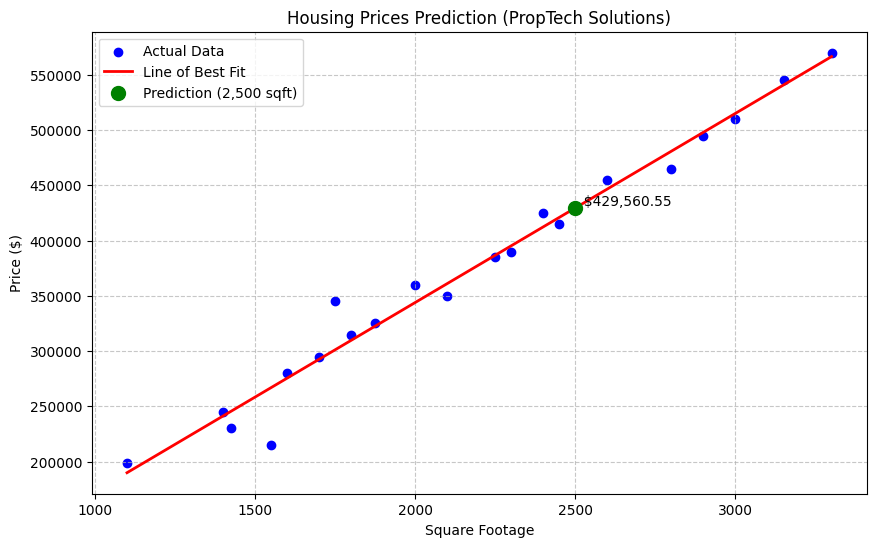

In [11]:
#Plotting

# Generate points for the line
line_x = [min(x_data), max(x_data)]
line_y = [predict_ols(x) for x in line_x]

plt.figure(figsize=(10, 6))

# Plot raw data points
plt.scatter(x_data, y_data, color='blue', label='Actual Data')

# Plot the regression line
plt.plot(line_x, line_y, color='red', linewidth=2, label='Line of Best Fit')

# Highlight the prediction for 2,500 sqft
plt.scatter([2500], [prediction_ols], color='green', s=100, zorder=5, label='Prediction (2,500 sqft)')
plt.text(2500, prediction_ols, f'  ${prediction_ols:,.2f}', verticalalignment='bottom', fontsize=10)

plt.title('Housing Prices Prediction (PropTech Solutions)')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()